/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

Predicted Average Age for Blue Lagoon on the next day:
Timeslot 8:00: 26.39
Timeslot 10:00: 24.91
Timeslot 12:00: 27.99
Timeslot 14:00: 31.15
Timeslot 16:00: 24.30

Predicted Average Age for Machu Picchu on the next day:
Timeslot 8:00: 32.18
Timeslot 10:00: 29.66
Timeslot 12:00: 26.36
Timeslot 14:00: 27.33
Timeslot 16:00: 27.77

Predicted Average Age for Taj Mahal on the next day:
Timeslot 8:00: 28.72
Timeslot 10:00: 28.82
Timeslot 12:00: 25.38
Timeslot 14:00: 30.19
Timeslot 16:00: 31.66

Predicted Average Age for Doge's Palace on the next day:
Timeslot 8:00: 27.40
Timeslot 10:00: 25.24
Timeslot 12:00: 21.13
Timeslot 14:00: 23.00
Timeslot 16:00: 41.65

Predicted Average Age for Louvre Museum on the next day:
Timeslot 8:00: 49.21
Timeslot 10:00: 35.43
Timeslot 12:00: 28.01
Timeslot 14:00: 43.89
Timeslot 16:00: 49.24



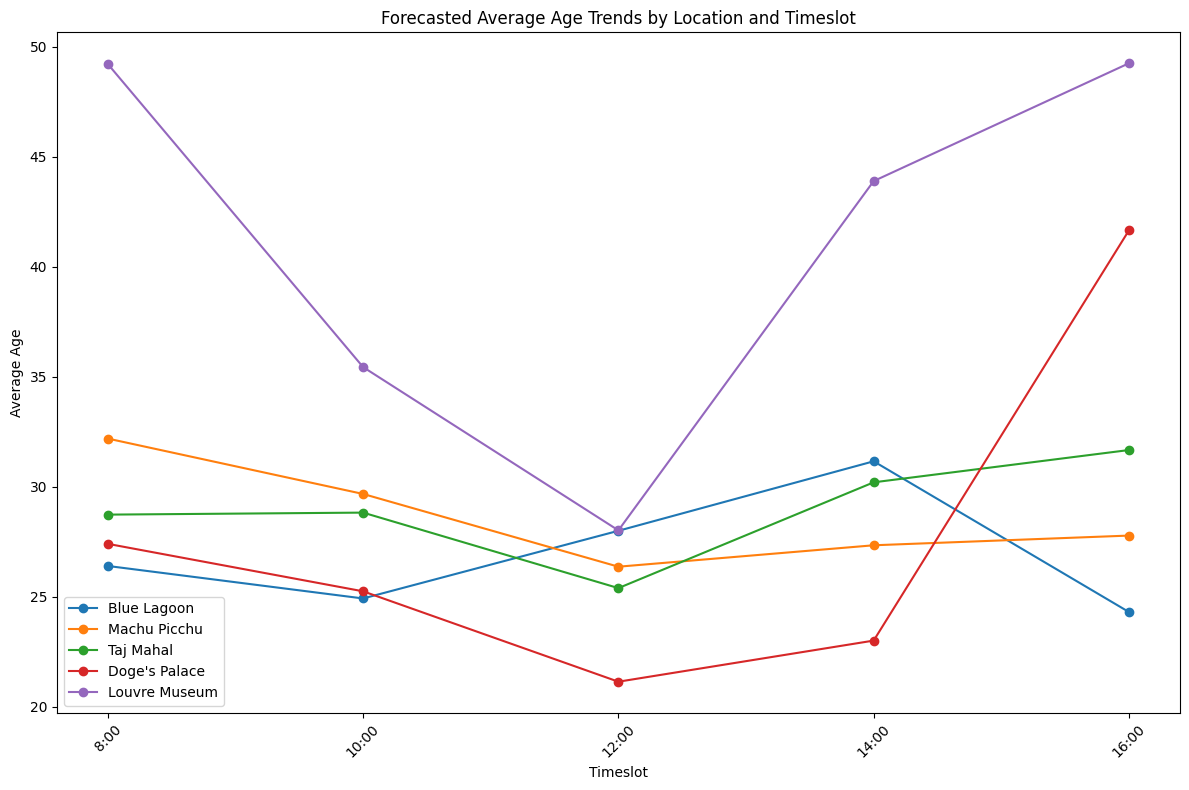

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/ForwardKeys_data.csv')

# Convert date to datetime
data['Date'] = pd.to_datetime(data['Date'])

timeslots = ['8:00', '10:00', '12:00', '14:00', '16:00']

locations = {
    'Blue Lagoon': 'Average Age - Blue Lagoon',
    'Machu Picchu': 'Average Age - Machu Picchu',
    'Taj Mahal': 'Average Age - Taj Mahal',
    'Doge\'s Palace': 'Average Age - Doge\'s Palace',
    'Louvre Museum': 'Average Age - Louvre Museum'
}

# int dictionary to store predictions
predictions = {loc: [] for loc in locations}

for location, age_column in locations.items():
    for timeslot in timeslots:
    
        specific_data = data[data['Time'].str.contains(timeslot)]

        # build features and target variable
        X = specific_data[['Date']].apply(lambda x: x.dt.strftime('%Y%m%d')).astype(int)  
        y = specific_data[age_column]  

        if not X.empty:
            # Train model
            regressor = RandomForestRegressor(n_estimators=100, random_state=42)
            regressor.fit(X, y)

            future_date = pd.Timestamp(data['Date'].max()) + pd.Timedelta(days=1)
            future_date_ordinal = int(future_date.strftime('%Y%m%d'))  
            future_prediction = regressor.predict([[future_date_ordinal]])

            # Store prediction
            predictions[location].append((timeslot, future_prediction[0]))

# print prediction
for location, preds in predictions.items():
    print(f"Predicted Average Age for {location} on the next day:")
    for timeslot, prediction in preds:
        print(f"Timeslot {timeslot}: {prediction:.2f}")
    print()

# viz
plt.figure(figsize=(12, 8))
for idx, (location, preds) in enumerate(predictions.items()):
    times = [pt[0] for pt in preds]
    values = [pt[1] for pt in preds]
    plt.plot(times, values, marker='o', label=location)
plt.xlabel('Timeslot')
plt.ylabel('Average Age')
plt.title('Forecasted Average Age Trends by Location and Timeslot')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/ForwardKeys_data.csv')

# Convert date to datetime
data['Date'] = pd.to_datetime(data['Date'])

timeslots = ['8:00', '10:00', '12:00', '14:00', '16:00']

locations = {
    'Blue Lagoon': 'Average Age - Blue Lagoon',
    'Machu Picchu': 'Average Age - Machu Picchu',
    'Taj Mahal': 'Average Age - Taj Mahal',
    'Doge\'s Palace': 'Average Age - Doge\'s Palace',
    'Louvre Museum': 'Average Age - Louvre Museum'
}

# Collect all predictions and actuals
all_y_test = []
all_y_pred = []

for location, age_column in locations.items():
    for timeslot in timeslots:
    
        specific_data = data[data['Time'].str.contains(timeslot)]

        # Prepare features and target variable
        X = specific_data[['Date']].apply(lambda x: x.dt.strftime('%Y%m%d')).astype(int)  
        y = specific_data[age_column]  

       
        if len(X) > 10: 
            # split data
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Train model
            regressor = RandomForestRegressor(n_estimators=100, random_state=42)
            regressor.fit(X_train, y_train)

            # Predict on the test set
            y_pred = regressor.predict(X_test)

            # collect results
            all_y_test.extend(y_test)
            all_y_pred.extend(y_pred)

# find Rmse and R squared
overall_rmse = np.sqrt(mean_squared_error(all_y_test, all_y_pred))
overall_r_squared = r2_score(all_y_test, all_y_pred)

print(f"Overall RMSE: {overall_rmse:.2f}")
print(f"Overall R²: {overall_r_squared:.2f}")


Overall RMSE: 9.67
Overall R²: -0.18


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

Predicted Average Age for Blue Lagoon on the next day:
Timeslot 8:00: 32.44
Timeslot 10:00: 32.37
Timeslot 12:00: 29.13
Timeslot 14:00: 26.83
Timeslot 16:00: 28.97

Predicted Average Age for Machu Picchu on the next day:
Timeslot 8:00: 32.47
Timeslot 10:00: 30.29
Timeslot 12:00: 23.65
Timeslot 14:00: 28.25
Timeslot 16:00: 24.75

Predicted Average Age for Taj Mahal on the next day:
Timeslot 8:00: 27.12
Timeslot 10:00: 27.64
Timeslot 12:00: 28.61
Timeslot 14:00: 27.91
Timeslot 16:00: 29.54

Predicted Average Age for Doge's Palace on the next day:
Timeslot 8:00: 40.70
Timeslot 10:00: 25.61
Timeslot 12:00: 28.47
Timeslot 14:00: 26.43
Timeslot 16:00: 37.63

Predicted Average Age for Louvre Museum on the next day:
Timeslot 8:00: 36.56
Timeslot 10:00: 46.34
Timeslot 12:00: 34.57
Timeslot 14:00: 35.73
Timeslot 16:00: 49.78



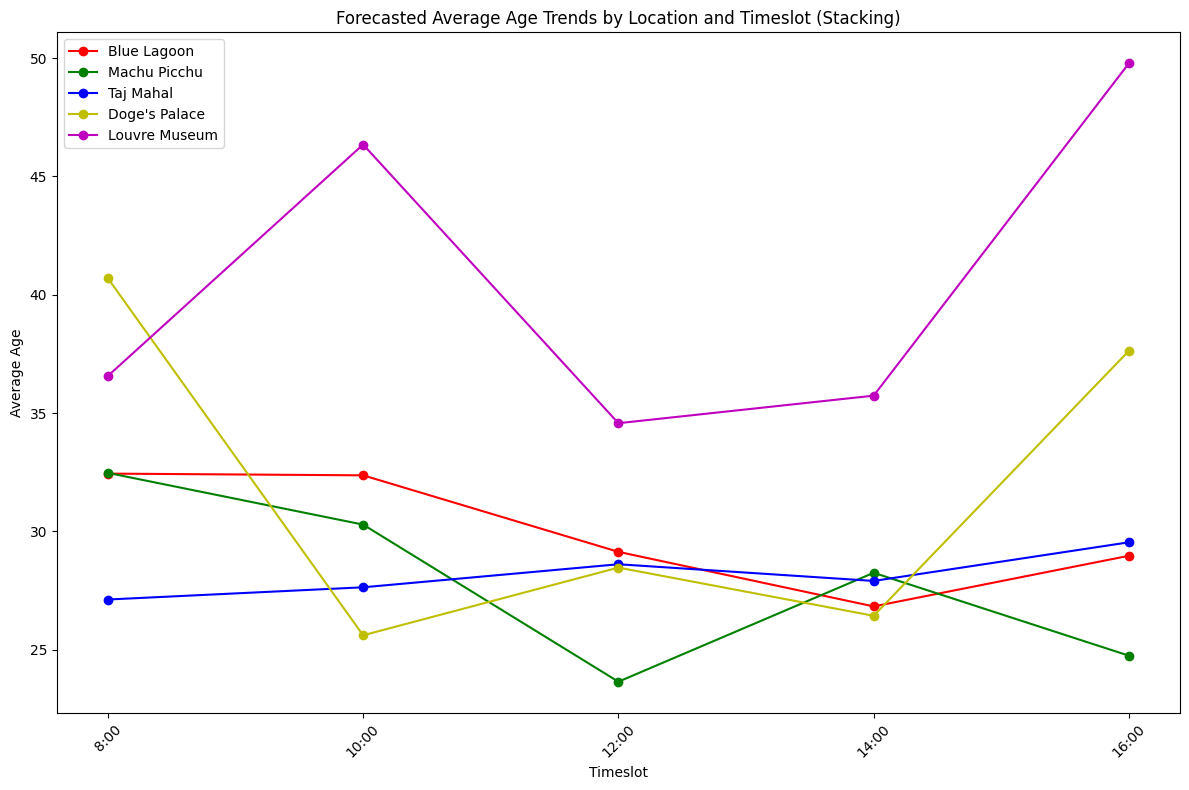

In [ ]:

# date to datetime
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek

timeslots = ['8:00', '10:00', '12:00', '14:00', '16:00']

locations = {
    'Blue Lagoon': 'Average Age - Blue Lagoon',
    'Machu Picchu': 'Average Age - Machu Picchu',
    'Taj Mahal': 'Average Age - Taj Mahal',
    'Doge\'s Palace': 'Average Age - Doge\'s Palace',
    'Louvre Museum': 'Average Age - Louvre Museum'
}
all_predictions = {loc: [] for loc in locations}

for location, age_column in locations.items():
    for timeslot in timeslots:
        # Filter data
        specific_data = data[data['Time'].str.contains(timeslot)]

        # Prepare features and target variable
        X = specific_data[['Year', 'Month', 'Day', 'DayOfWeek']] 
        y = specific_data[age_column] 

        if not X.empty and not y.empty:
            # Split data
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Initialize base learners
            base_learners = [
                ('rf1', RandomForestRegressor(n_estimators=50, random_state=42)),
                ('rf2', RandomForestRegressor(n_estimators=50, random_state=42))
            ]

            # Initialize stacking regressor
            stacking_regressor = StackingRegressor(
                estimators=base_learners,
                final_estimator=RandomForestRegressor(n_estimators=100, random_state=42)
            )

            # Train stacking regressor
            stacking_regressor.fit(X_train, y_train)

            # Predict for next day
            future_date = pd.Timestamp(data['Date'].max()) + pd.Timedelta(days=1)
            future_features = [[future_date.year, future_date.month, future_date.day, future_date.dayofweek]]
            future_prediction = stacking_regressor.predict(future_features)

            # Store prediction
            all_predictions[location].append((timeslot, future_prediction[0]))

# Print the predictions for each location for the next day
for location, preds in all_predictions.items():
    print(f"Predicted Average Age for {location} on the next day:")
    for timeslot, prediction in preds:
        print(f"Timeslot {timeslot}: {prediction:.2f}")
    print()

# viz
plt.figure(figsize=(12, 8))
colors = ['r', 'g', 'b', 'y', 'm']
for idx, (location, preds) in enumerate(all_predictions.items()):
    times = [pt[0] for pt in preds]
    values = [pt[1] for pt in preds]
    plt.plot(times, values, marker='o', label=location, color=colors[idx % len(colors)])
plt.xlabel('Timeslot')
plt.ylabel('Average Age')
plt.title('Forecasted Average Age Trends by Location and Timeslot (Stacking)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/ForwardKeys_data.csv')

# date to  datetime 
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek

timeslots = ['8:00', '10:00', '12:00', '14:00', '16:00']

locations = {
    'Blue Lagoon': 'Average Age - Blue Lagoon',
    'Machu Picchu': 'Average Age - Machu Picchu',
    'Taj Mahal': 'Average Age - Taj Mahal',
    'Doge\'s Palace': 'Average Age - Doge\'s Palace',
    'Louvre Museum': 'Average Age - Louvre Museum'
}

all_actuals = []
all_predictions = []

for location, age_column in locations.items():
    for timeslot in timeslots:
       
        specific_data = data[data['Time'].str.contains(timeslot)]

        X = specific_data[['Year', 'Month', 'Day', 'DayOfWeek']]  
        y = specific_data[age_column] 

       
        if len(X) > 10:  
            # split data 
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Initialize baselearners 
            base_learners = [
                ('rf1', RandomForestRegressor(n_estimators=50, random_state=42)),
                ('rf2', RandomForestRegressor(n_estimators=50, random_state=42))
            ]

            # Initialize stacking regressor
            stacking_regressor = StackingRegressor(
                estimators=base_learners,
                final_estimator=RandomForestRegressor(n_estimators=100, random_state=42)
            )

            # Train stacking regressor
            stacking_regressor.fit(X_train, y_train)

            # Predict ontest data
            y_pred = stacking_regressor.predict(X_test)

            # Collect predictions
            all_actuals.extend(y_test)
            all_predictions.extend(y_pred)

# find RMSE aand Rsquare
global_rmse = np.sqrt(mean_squared_error(all_actuals, all_predictions))
global_r2 = r2_score(all_actuals, all_predictions)

print(f"Global RMSE: {global_rmse:.2f}")
print(f"Global R²: {global_r2:.2f}")


Global RMSE: 5.85
Global R²: 0.57
